4/4 [==============================] - 0s 2ms/step


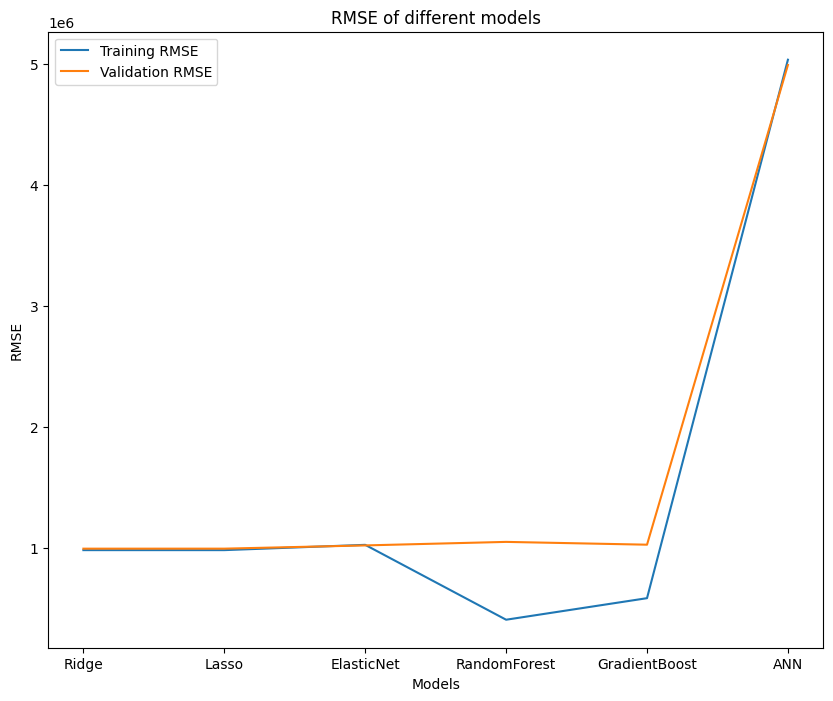

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('house.csv')

# Convert categorical data to numeric data
df = pd.get_dummies(df, drop_first=True)

# Remove rows with missing values
df = df.dropna()

# Split data into training, validation and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(df.drop(columns='price'), df['price'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# List of models
models = [Ridge(), Lasso(), ElasticNet(), RandomForestRegressor(), GradientBoostingRegressor()]

# Initialize list to store training errors
train_errors = []
val_errors = []

# Train and evaluate each model
for model in models:
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Calculate training and validation errors
    train_errors.append(mean_squared_error(y_train, model.predict(X_train_scaled)))
    val_errors.append(mean_squared_error(y_val, model.predict(X_val_scaled)))

# ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=50, verbose=0)

# Calculate training and validation errors for ANN model
train_errors.append(mean_squared_error(y_train, model.predict(X_train_scaled)))
val_errors.append(mean_squared_error(y_val, model.predict(X_val_scaled)))

# Model names
model_names = ['Ridge', 'Lasso', 'ElasticNet', 'RandomForest', 'GradientBoost', 'ANN']

# Plot training and validation errors
plt.figure(figsize=(10, 8))
plt.plot(model_names, np.sqrt(train_errors), label='Training RMSE')
plt.plot(model_names, np.sqrt(val_errors), label='Validation RMSE')
plt.legend()
plt.title('RMSE of different models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()
